Sales Prediction using Python

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("C:\\Users\\arjav\\Downloads\\archive (3)\\Advertising.csv")  # Replace with your actual path if needed
df.head()


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [2]:
# Basic Info
print("\n--- Dataset Info ---")
print(df.info())

# Missing values
print("\n--- Missing Values ---")
print(df.isnull().sum())

# Summary statistics
print("\n--- Summary ---")
print(df.describe())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None

--- Missing Values ---
Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

--- Summary ---
       Unnamed: 0          TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000  200.000000
mean   100.500000  147.042500   23.264000   30.554000   14.022500
std     57.879185   85.854236   14.846809   21.778621    5.217457
min      1.000000    0.700000    0.000000    0.300000    1.600000
25%     50.750000   74.375000    9.975000   12.750000   10.375000
50

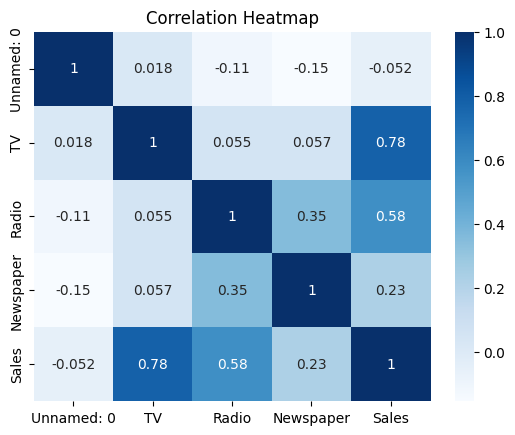

In [3]:
# Remove duplicates (if any)
df.drop_duplicates(inplace=True)

# Visual check for correlation
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()


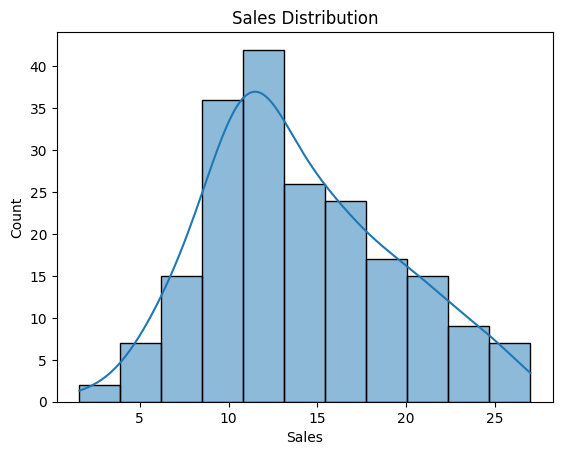

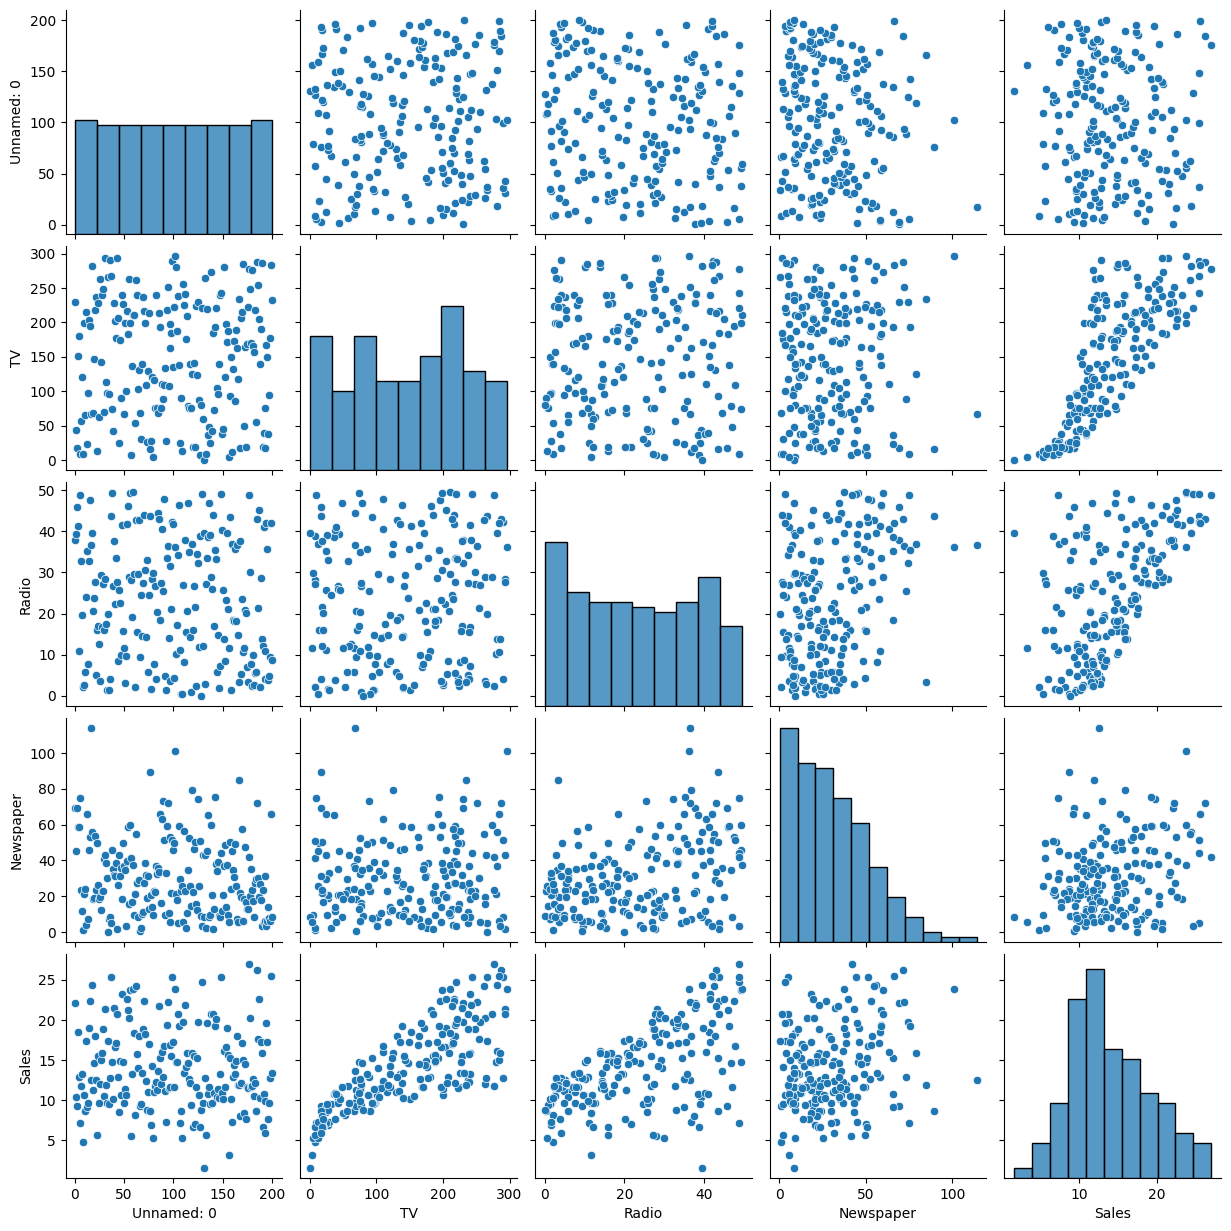

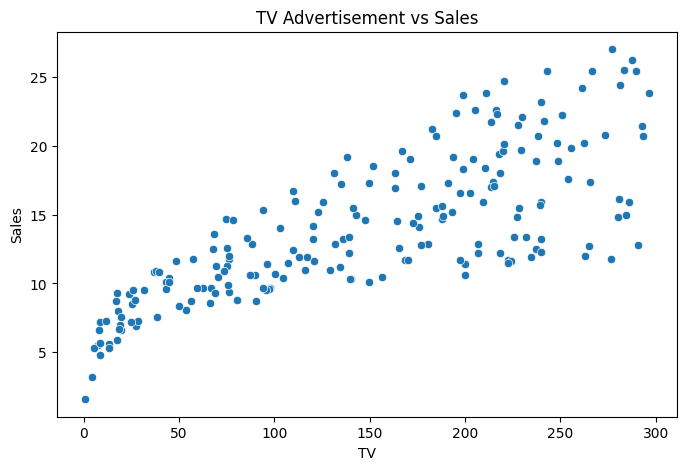

In [4]:
# Distribution of Sales
sns.histplot(df['Sales'], kde=True)
plt.title("Sales Distribution")
plt.xlabel("Sales")
plt.show()

# Pairplot of features
sns.pairplot(df)
plt.show()

# Scatter plot for TV and Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x='TV', y='Sales', data=df)
plt.title("TV Advertisement vs Sales")
plt.show()


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Feature & Target
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)


R² Score: 0.899438024100912
Mean Squared Error: 3.1740973539761033


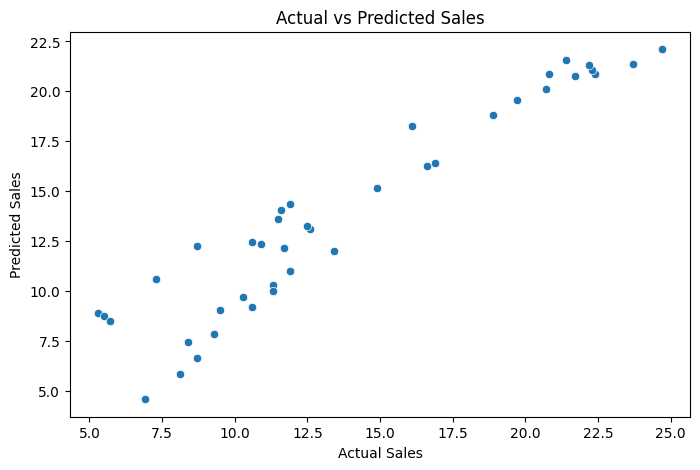

In [6]:
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# Actual vs Predicted
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.show()


           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761


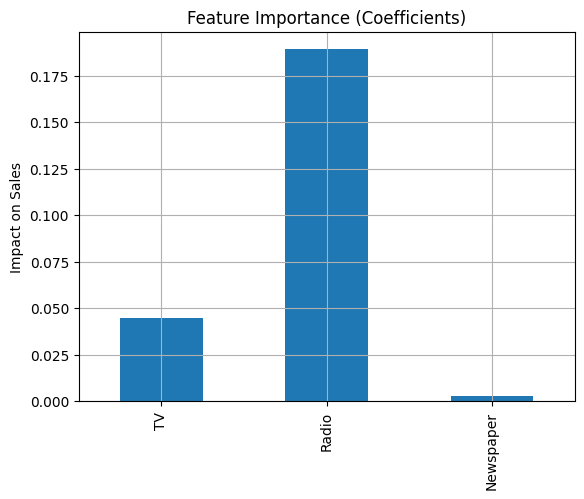

In [7]:
# Feature importance
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

coeff_df.plot(kind='bar', legend=False)
plt.title("Feature Importance (Coefficients)")
plt.ylabel("Impact on Sales")
plt.grid(True)
plt.show()
